# Match kernel
Notebook by Laetitia Chapel and Romain Tavenard

## Reference

This refers to the following paper by Bo & Sminchisescu:
> Bo, L., & Sminchisescu, C. (2009). 
> Efficient match kernel between sets of features for visual recognition. 
> In Advances in neural information processing systems (pp. 135-143).

## Problem statement

The idea here is to define a kernel $K$ between sets of features that relies on a local kernel $k$ that operates at the feature level:

$$K(\mathcal{X}, \mathcal{Y}) = \frac{\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} k(x, y)}{\text{card}(\mathcal{X}) \cdot \text{card}(\mathcal{Y})}.$$



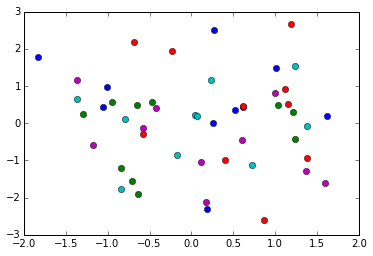

In [1]:
%matplotlib inline
import numpy
import pylab
from sklearn.metrics.pairwise import rbf_kernel


def match_kernel(set1, set2, gamma):
    return numpy.sum(rbf_kernel(set1, set2, gamma=gamma)) / (len(set1) * len(set2))

n_sets = 5
n_features_per_set = 10
d = 2
random_data = numpy.random.randn(n_sets, n_features_per_set, d)

# Plotting the kind of data we will be working with (but only few sets to keep things readable)
for s in random_data:
    _ = pylab.plot(s[:, 0], s[:, 1], "o")

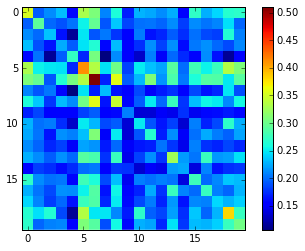

In [2]:
n_sets = 20
n_features_per_set = 10
d = 2
random_data = numpy.random.randn(n_sets, n_features_per_set, d)

K = numpy.empty((n_sets, n_sets))
for i in range(n_sets):
    for j in range(n_sets):
        K[i, j] = match_kernel(random_data[i], random_data[j], gamma=1.)

_ = pylab.imshow(K, interpolation="none")
_ = pylab.colorbar()

Then, let us have a look at the properties of this kernel.

First, what do diagonal values look like?

In [3]:
print(numpy.diag(K))

[ 0.35452364  0.29351383  0.23503205  0.2262637   0.27348108  0.41251933
  0.51115946  0.23235057  0.3454957   0.20833034  0.25147261  0.26685962
  0.20386737  0.32626603  0.22471542  0.27737858  0.27534215  0.24221811
  0.382295    0.30266103]


This is something we are not very happy with: how can one say that $\mathcal{X}$ is more similar to itself than $\mathcal{Y}$ is to itself?

Another point that is bothering us is that $\mathcal{Y}$ can be more similar to $\mathcal{X}$ than $\mathcal{X}$ itself:

In [4]:
for i in range(n_sets):
    for j in range(n_sets):
        if K[i, j] > min(K[i, i], K[j, j]):
            print("(%d,%d) is one example of such a behaviour (Kij=%.2f, Kii=%.2f, Kjj=%.2f)" % (i, j, K[i, j], K[i, i], K[j, j]))

(0,3) is one example of such a behaviour (Kij=0.23, Kii=0.35, Kjj=0.23)
(0,12) is one example of such a behaviour (Kij=0.21, Kii=0.35, Kjj=0.20)
(0,17) is one example of such a behaviour (Kij=0.24, Kii=0.35, Kjj=0.24)
(1,6) is one example of such a behaviour (Kij=0.30, Kii=0.29, Kjj=0.51)
(2,5) is one example of such a behaviour (Kij=0.25, Kii=0.24, Kjj=0.41)
(2,18) is one example of such a behaviour (Kij=0.27, Kii=0.24, Kjj=0.38)
(3,0) is one example of such a behaviour (Kij=0.23, Kii=0.23, Kjj=0.35)
(3,5) is one example of such a behaviour (Kij=0.25, Kii=0.23, Kjj=0.41)
(3,6) is one example of such a behaviour (Kij=0.26, Kii=0.23, Kjj=0.51)
(3,8) is one example of such a behaviour (Kij=0.23, Kii=0.23, Kjj=0.35)
(4,6) is one example of such a behaviour (Kij=0.31, Kii=0.27, Kjj=0.51)
(5,2) is one example of such a behaviour (Kij=0.25, Kii=0.41, Kjj=0.24)
(5,3) is one example of such a behaviour (Kij=0.25, Kii=0.41, Kjj=0.23)
(5,7) is one example of such a behaviour (Kij=0.25, Kii=0.41,

Finally, if we normalize the kernel, we get:

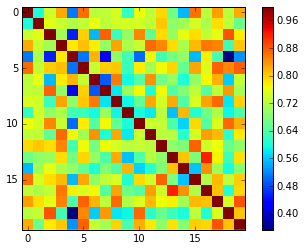

In [5]:
K_diag_sqrt = numpy.sqrt(numpy.diag(K))

K = K / K_diag_sqrt.reshape((-1, 1))
K = K / K_diag_sqrt.reshape((1, -1))

_ = pylab.imshow(K, interpolation="none")
_ = pylab.colorbar()

In [6]:
print(numpy.diag(K))
for i in range(n_sets):
    for j in range(n_sets):
        if K[i, j] > min(K[i, i], K[j, j]):
            print("(%d,%d) is greater than 1. (Kij=%.2f)" % (i, j, K[i, j]))
        

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [7]:
n_sets = 1000
n_features_per_set = 2
d = 1
random_data = numpy.random.randn(n_sets, n_features_per_set, d)

K = numpy.empty((n_sets, n_sets))
for i in range(n_sets):
    for j in range(n_sets):
        K[i, j] = match_kernel(random_data[i], random_data[j], gamma=1.)

K_diag_sqrt = numpy.sqrt(numpy.diag(K))

K = K / K_diag_sqrt.reshape((-1, 1))
K = K / K_diag_sqrt.reshape((1, -1))

print(numpy.sum(K > 1. + 1e-6))


0


This is because, in this case, $K$ is such that, for all $\mathcal{X}$, we have:
$$K(\mathcal{X},\mathcal{X}) = 1.$$

Hence, by applying Cauchy-Schwartz inequality in the RKHS associated to $K$, we get (for all $\mathcal{X}$ and $\mathcal{Y}$):
$$K(\mathcal{X}, \mathcal{Y})^2 \leq K(\mathcal{X},\mathcal{X}) \cdot K(\mathcal{Y},\mathcal{Y}) = 1.$$